In [2]:
from utils.utils import format_seaborn_plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Read the data from a CSV file
df = pd.read_csv('data/Abandono_clientes.csv')
df_exited = df.loc[df["Exited"]==1]
df_not_exited = df.loc[df["Exited"]==0]

# Display the first few rows of the dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data preprocessing and cleaning 
Preprocessing and cleaning are essential steps in data analysis and machine learning projects. They involve transforming raw data into a usable and reliable format for analysis, modeling, and decision-making. 

## Data Integrity
- Identify missing values
- Identify duplicate entries
- Check data formats

In [2]:
# Information of type in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
# Summary statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


From this info we can check that there are <span style="background-color:lightgray">no missing values</span> and identify the <span style="background-color:lightgray">type</span> in each column

## Analysis
- Check for data imbalance
- Remove irrelevant information
- Analyse distribution of each feature
- Check for outliers

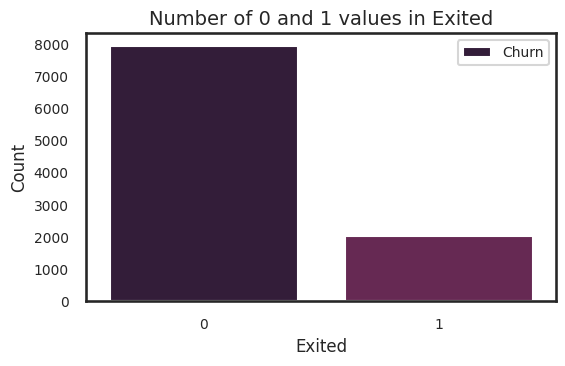

In [4]:
# Data balance between target variable
format_seaborn_plots()

sns.countplot(data=df, x='Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Number of 0 and 1 values in Exited')
plt.legend(labels=['Churn', 'Not Churn'])

plt.show()

From this chart we can verify that the data is <span style="background-color:lightgray">not balanced</span>.

This imbalance should be considered for the entire EDA. Special attention for charts with absolute value and counts.

<span style='color:white; background-color:#35193e'>Consideration for feature engineering:</span>
- It's important to handle class imbalance appropriately to avoid biased model performance and ensure fair and accurate predictions for both classes.

- Techniques such as oversampling the minority class, undersampling the majority class, or using algorithms specifically designed for imbalanced data can be employed to mitigate the effects of class imbalance.


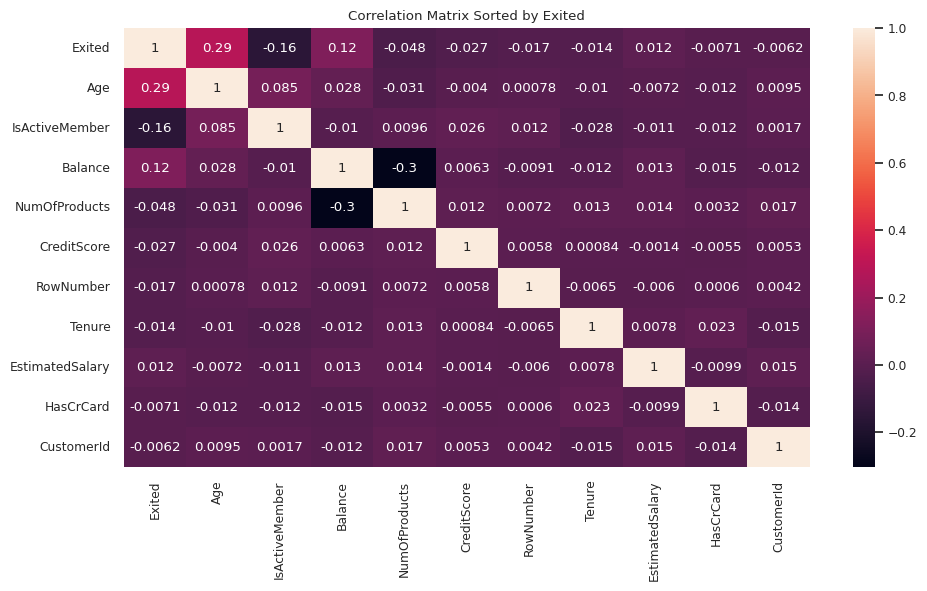

In [5]:
# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Sort correlation matrix based on correlation with "Exited" column
corr_with_exited = corr_matrix['Exited'].abs().sort_values(ascending=False)
corr_matrix_sorted = corr_matrix.loc[corr_with_exited.index, corr_with_exited.index]

# Plot correlation heatmap
format_seaborn_plots()
sns.set(font_scale=0.8)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix_sorted, annot=True)
plt.title('Correlation Matrix Sorted by Exited')
plt.show()

From the correlation matrix we can check that <span style="background-color:#d96c64">"CustomerId"</span> is irrelevant to the Exited output. And that <span style="background-color:#77b072">Age</span>, <span style="background-color:#77b072">IsActiveMember</span> and <span style="background-color:#77b072">Balance</span> seems to be important features for the predictions. 

## Analysis of each column values and distribution

### Age

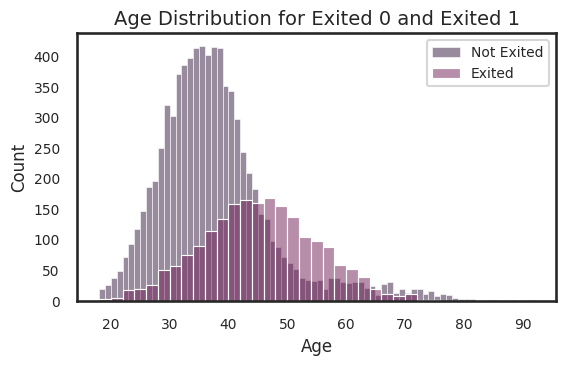

In [24]:
format_seaborn_plots()

# Plot the histograms
sns.histplot(data=df_not_exited, x='Age', label='Not Exited', alpha=0.5)
sns.histplot(data=df_exited, x='Age', label='Exited', alpha=0.5)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution for Exited 0 and Exited 1')

# Add legend
plt.legend()

# Show the plot

In [22]:
# Calculate z-scores
z_scores = np.abs((df['Age'] - df['Age'].mean()) / df['Age'].std())

# Define threshold for outlier detection
threshold = 3

# Identify outliers
outliers = df[z_scores > threshold]

# Print the outliers
#print(outliers)

df2 =df.drop(outliers.index)
df2_exited = df2[df2['Exited']==1]
df2_not_exited = df2[df2['Exited']==0]

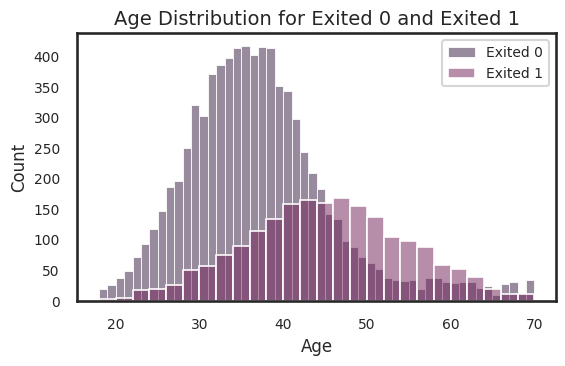

In [23]:
format_seaborn_plots()

# Plot the histograms
sns.histplot(data=df2_not_exited, x='Age', label='Exited 0', alpha=0.5)
sns.histplot(data=df2_exited, x='Age', label='Exited 1', alpha=0.5)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution for Exited 0 and Exited 1')

# Add legend
plt.legend()

# Show the plot

### Is Active Member

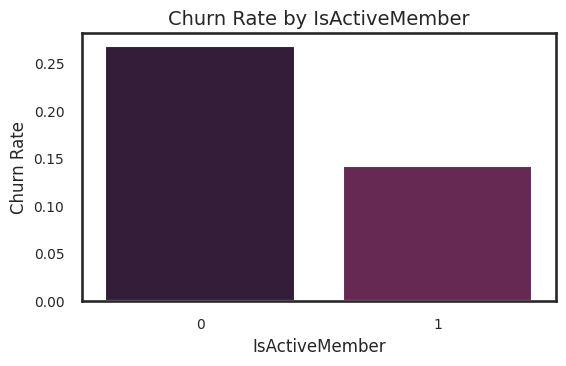

In [26]:
format_seaborn_plots()

# Calculate churn rate for IsActiveMember categories
churn_rate = df.groupby('IsActiveMember')['Exited'].mean()

# Plot churn rate bar plot
sns.barplot(x=churn_rate.index, y=churn_rate.values)
plt.xlabel('IsActiveMember')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by IsActiveMember')
plt.show()

From the churn rate we can verify that <span style="background-color:#77b072">Active Members are less likely to leave the bank.</span>

### Balance

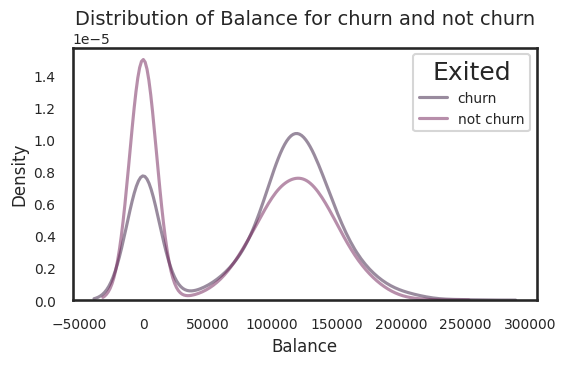

In [37]:
format_seaborn_plots()

# Plot histogram for Balance column
sns.kdeplot(data=df_exited, x='Balance', label='churn', alpha=0.5)
sns.kdeplot(data=df_not_exited, x='Balance', label='not churn', alpha=0.5)

plt.xlabel('Balance')
plt.ylabel('Density')
plt.title('Distribution of Balance for churn and not churn')
plt.legend(title='Exited')

plt.show()

The "Balance" feature itself may not directly indicate churn.

<span style='color:white; background-color:#35193e'>Consideration for feature engineering:</span>

It can be used in combination with other features to create more informative predictors. For example, you can create new features such as "Balance-to-Income Ratio" or "Balance Change Over Time" to capture additional aspects of customers' financial behavior, which might be indicative of their likelihood to churn.

### Number of Products

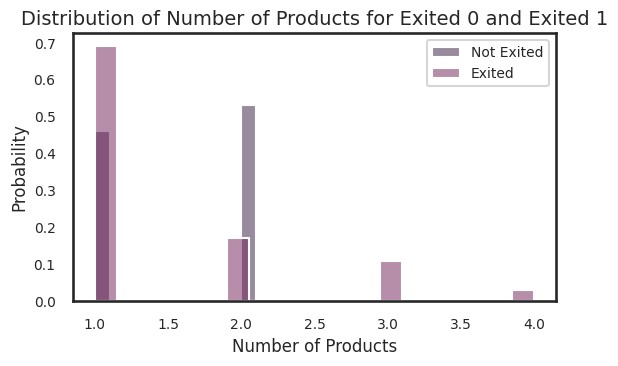

In [53]:
format_seaborn_plots()

# Plot the histograms as rates
sns.histplot(data=df_not_exited, x='NumOfProducts', label='Not Exited', alpha=0.5, stat="probability")
sns.histplot(data=df_exited, x='NumOfProducts', label='Exited', alpha=0.5, stat="probability")

# Set plot labels and title
plt.xlabel('Number of Products')
plt.ylabel('Probability')
plt.title('Distribution of Number of Products for Exited 0 and Exited 1')

# Add legend
plt.legend()

# Show the plot
plt.show()

From the information above, we can check the probability of members to leave the bank. The highlight is when num of products is two, where the probability of members not to leave is significantly greater than to exit.

<span style='color:white; background-color:#35193e'>Consideration for feature engineering:</span>

This column should be transformed into a cathegorical feature. It is an integer now. This should be done because the absolute value is not related to the probability of churn. higher number of products dont represent higher probability of churn.

### Credit Score

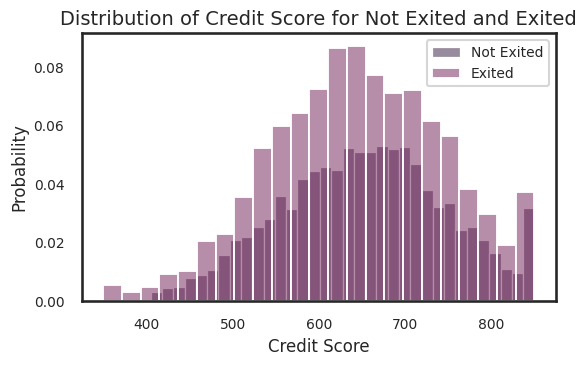

In [63]:
format_seaborn_plots()

# Plot the histograms as rates
sns.histplot(data=df_not_exited, x='CreditScore', label='Not Exited', alpha=0.5, stat="probability")
sns.histplot(data=df_exited, x='CreditScore', label='Exited', alpha=0.5, stat="probability")

# Set plot labels and title
plt.xlabel('Credit Score')
plt.ylabel('Probability')
plt.title('Distribution of Credit Score for Not Exited and Exited')

# Add legend
plt.legend()

# Show the plot
plt.show()

From the chart above it can be seen that the credit score alone does not provide much relevant information for churn prediction.

<span style='color:white; background-color:#35193e'>Consideration for feature engineering:</span>

It should be arranged with other features to get more insightfull information about the customer financial profile.

### Tenure

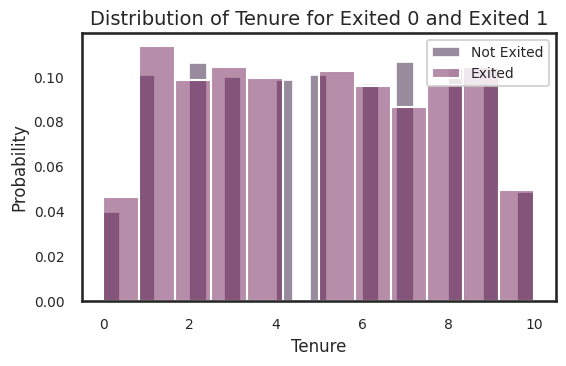

In [66]:
format_seaborn_plots()

# Plot the histograms as rates
sns.histplot(data=df_not_exited, x='Tenure', label='Not Exited', alpha=0.5, stat="probability")
sns.histplot(data=df_exited, x='Tenure', label='Exited', alpha=0.5, stat="probability")

# Set plot labels and title
plt.xlabel('Tenure')
plt.ylabel('Probability')
plt.title('Distribution of Tenure for Exited 0 and Exited 1')

# Add legend
plt.legend()

# Show the plot
plt.show()

As expected from the correlation matrix, this feature is not directly related to the churn prediction.

but also from the corre mat we can check how this feature is related to other finantial aspects such as credit score and estimated salary

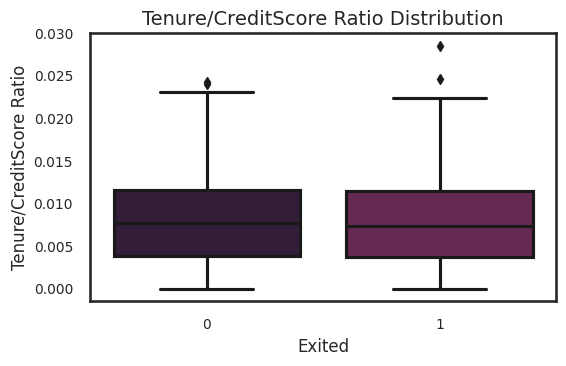

In [77]:
format_seaborn_plots()

# Create box plot
sns.boxplot(data=df, x='Exited', y='Tenure_CreditScore_Ratio')
plt.xlabel('Exited')
plt.ylabel('Tenure/CreditScore Ratio')
plt.title('Tenure/CreditScore Ratio Distribution')

plt.show()

Analyzing relationship with age

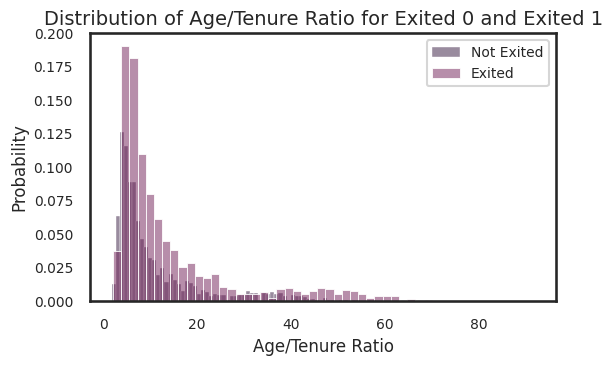

In [99]:
format_seaborn_plots()

# Plot histogram for 'Age_Tenure_Ratio' column for 'Exited' == 0
sns.histplot(data=df[df['Exited'] == 0], x='Age_Tenure_Ratio', label='Not Exited', alpha=0.5, stat='probability')

# Plot histogram for 'Age_Tenure_Ratio' column for 'Exited' == 1
sns.histplot(data=df[df['Exited'] == 1], x='Age_Tenure_Ratio', label='Exited', alpha=0.5, stat='probability')

# Set plot labels and title
plt.xlabel('Age/Tenure Ratio')
plt.ylabel('Probability')
plt.title('Distribution of Age/Tenure Ratio for Exited 0 and Exited 1')

# Add legend
plt.legend()

# Show the plot
plt.show()

From the chart above we can't get much iniformation from the Tenure Feature.

<span style='color:white; background-color:#35193e'>Consideration for feature engineering:</span>

- Transform into cathegorical variables
- Try to create new features by arranging with others.

### Estimated Salary

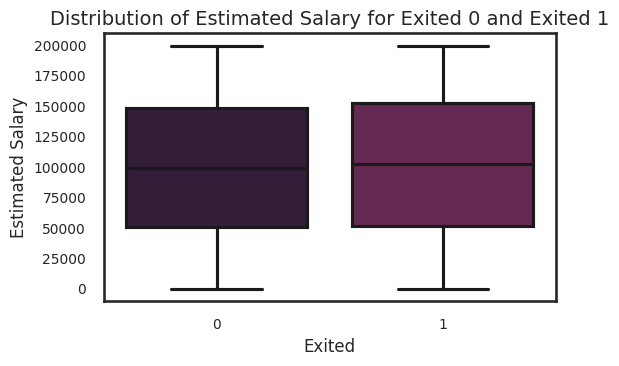

In [81]:
format_seaborn_plots()

# Create boxplot
sns.boxplot(data=df, x='Exited', y='EstimatedSalary')
plt.xlabel('Exited')
plt.ylabel('Estimated Salary')
plt.title('Distribution of Estimated Salary for Exited 0 and Exited 1')

# Show the plot
plt.show()


From the chart above we can see that the Estimated Salary alone don't provide much information for the churn prediction.

### Has a Credit Card

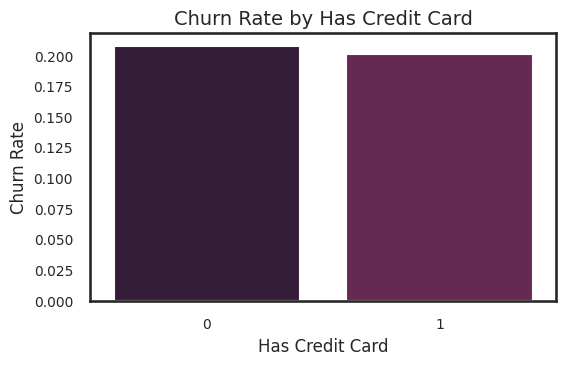

In [89]:
format_seaborn_plots()

# Calculate the churn rate for each category of HasCrCard
churn_rate_df = df.groupby('HasCrCard')['Exited'].mean().reset_index(name='Churn Rate')

# Create bar plot
sns.barplot(data=churn_rate_df, x='HasCrCard', y='Churn Rate')

# Set plot labels and title
plt.xlabel('Has Credit Card')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Has Credit Card')

# Show the plot
plt.show()


Accurate Analysis: Clean and preprocessed data ensures the accuracy of analysis results. By removing outliers, noise, or irrelevant information, you can obtain more reliable insights and make better-informed decisions based on the data.

Feature Engineering: Preprocessing enables feature engineering, which involves creating new meaningful features from the existing dataset. This process can involve scaling, normalization, encoding categorical variables, or transforming variables to better represent relationships in the data. Feature engineering can greatly enhance the performance of machine learning models and increase their predictive power.

Dimensionality Reduction: Preprocessing techniques, such as feature selection or extraction, help reduce the number of input variables without significantly losing important information. Dimensionality reduction simplifies models, speeds up computation, and can prevent overfitting by removing redundant or noisy features.

Data Compatibility: Preprocessing ensures that data from different sources can be combined and analyzed effectively. It involves standardizing data formats, resolving inconsistencies, and aligning variables to enable meaningful comparisons and merging of datasets.

Model Performance: Clean and preprocessed data significantly improves the performance of machine learning models. By removing noise, irrelevant features, or biases, models can focus on relevant patterns and relationships in the data, leading to more accurate predictions and better generalization on new, unseen data.

Interpretability and Transparency: Preprocessing and cleaning help in ensuring the interpretability and transparency of the analysis process. By documenting the steps taken to preprocess and clean the data, researchers and stakeholders can understand and verify the transformations applied, making the analysis process more transparent and reproducible.

Overall, preprocessing and cleaning are crucial steps in data analysis and machine learning projects. They enable accurate, reliable, and meaningful insights by addressing data quality issues, improving data compatibility, enhancing model performance, and facilitating feature engineering and dimensionality reduction.

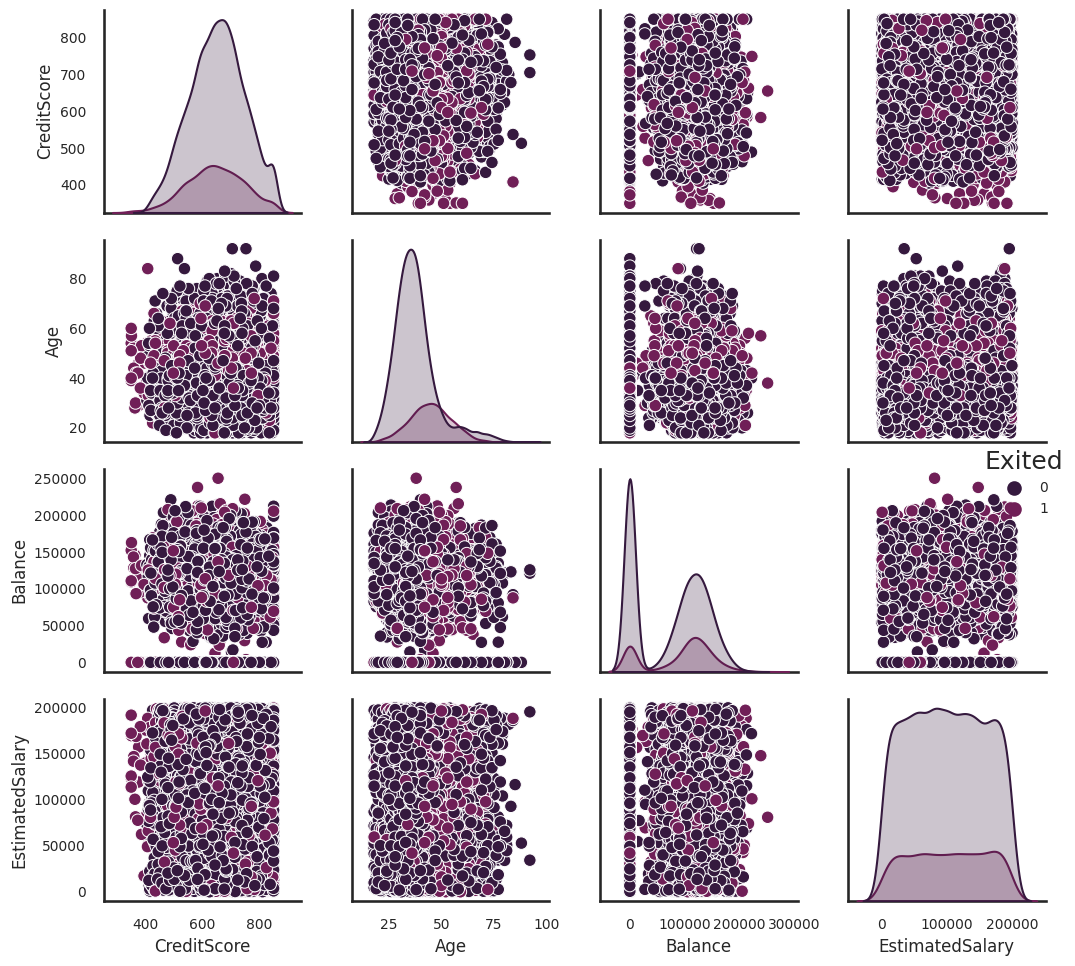

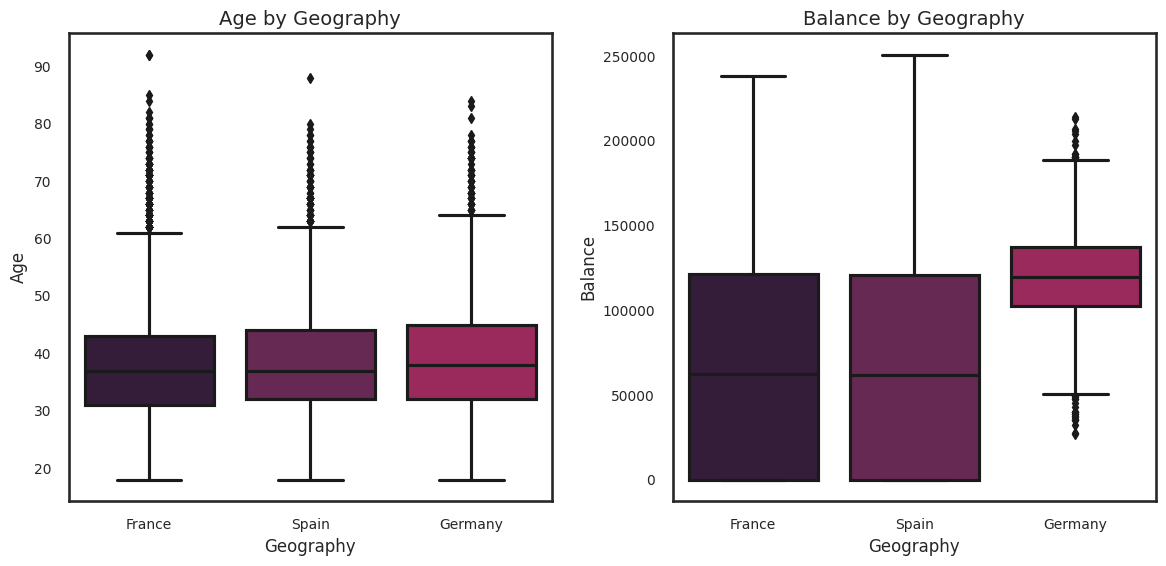

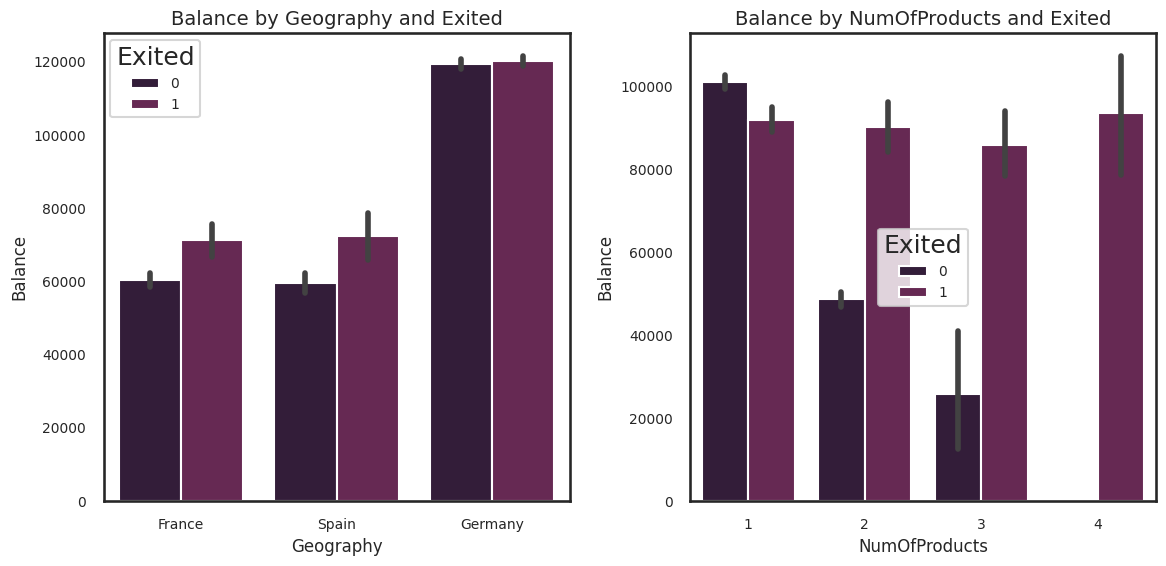

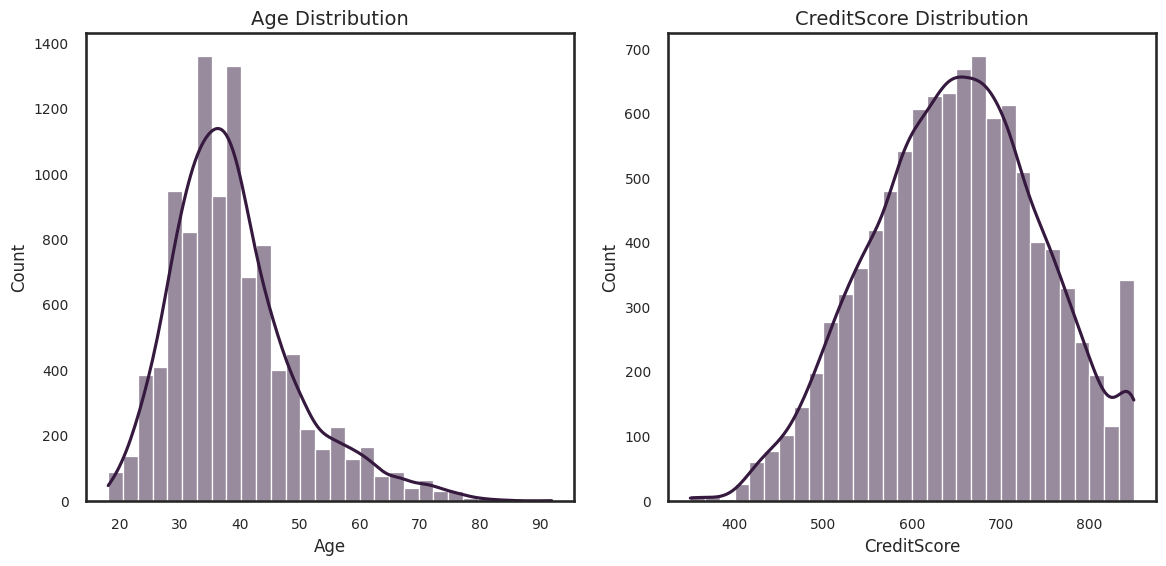

In [8]:

# Pairwise scatter plot
sns.pairplot(df, vars=['CreditScore', 'Age', 'Balance', 'EstimatedSalary'], hue='Exited')
plt.show()

# Box plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Geography', y='Age', data=df)
plt.title('Age by Geography')

plt.subplot(1, 2, 2)
sns.boxplot(x='Geography', y='Balance', data=df)
plt.title('Balance by Geography')
plt.show()

# Bar plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Geography', y='Balance', hue='Exited', data=df)
plt.title('Balance by Geography and Exited')

plt.subplot(1, 2, 2)
sns.barplot(x='NumOfProducts', y='Balance', hue='Exited', data=df)
plt.title('Balance by NumOfProducts and Exited')
plt.show()

# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='CreditScore', bins=30, kde=True)
plt.title('CreditScore Distribution')
plt.show()
